<a href="https://colab.research.google.com/github/ju-vargas/Classificacao-e-Pesquisa-de-Dados/blob/main/Lab02/labCPD_02_CPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina de Classificação e Pesquisa de Dados

# Laboratório #2

### Implementação dos principais algoritmos de Classificação por Trocas (em C++)



A seguir você encontra os algoritmos bubblesort e quicksort-padrão (este último com uma versão tradicional do algoritmo de partição). 

A sua tarefa consiste em explorar o funcionamento desses algoritmos, contabilizando a quantidade de comparações e trocas, além de mensurar o tempo de processamento (em milisegundos) para diferentes tipos de arrays (crescente, decrescente e aleatório), em diferentes tamanhos (100, 1000, 10000 e 100000). Procure salvar os resultados em uma matriz ou, preferencialmente, em um arquivo (em especial se não utilizar o Google Colab). Procure resolver os problemas do algoritmo quicksort-padrão, se encontrar, fazendo com que o algoritmo não caia no pior caso e também com que ele não tenha problemas quando todos os elementos forem iguais. Implemente, além deles, os algoritmos combsort e shake sort.

Mais especificamente, você deve realizar as seguintes atividades:

1. Verificar se o algoritmo quicksort-padrão funciona para todos os casos (tamanhos e tipos de array) e se ele realmente é melhor do que os vistos anteriormente (ao menos em outras situações que não sejam o pior caso). Explique os motivos, caso não funcione ou tenha desempenho pior que o insertionsort. 

2. Melhorar o quicksort (em especial o algoritmo de partição) para que as chances de cair no pior caso sejam as menores o possível. Faça-o funcionar em todos os casos (tamanhos e tipos de array). Você pode utilizar as técnicas discutidas em aula (troca aleatória do primeiro elemento, implementação de pilha própria, versão não recursiva, recursão priorizando menor lado primeiro...).

3. Verifique ainda se o algoritmo quicksort-padrão funciona para arrays cujos elementos sejam todos iguais (10000 elementos) e, caso não funciona, explique os motivos e procure criar uma versão que funcione. 

4. Finalmente, implemente também os algoritmos comb_sort e o shake_sort e teste com diferentes tipos de array (crescente, decrescente e aleatório) e para arrays de tamanho 100, 1000 e 10000.

Em todos os casos, registre a quantidade de comparações, trocas e o tempo de processamento. 

# Original

In [16]:
%%writefile sorting.cpp
// Atenção: usa código C++11
// para saber se o seu compilador tem suporte, execute: 
// cout << __cplusplus;
// O resultado deve ser 201103L ou maior.
// o do google collab é C++14 
// A grande maioria dos compiladores atuais suporta nativamente c++11. 
// Outros exigem a configuração de parâmetros de compilação... Verifique a documentação do seu.

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>
#include<chrono>

#define MAX 100                                                                  // quantidade de números no array

using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de <trocas , comparacoes>
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

void bubblesort(array_t, array_size_t, loginfo_t&);
void quicksort(array_t, int, int, loginfo_t&);
int particiona(array_t array, int i, int f, loginfo_t&);
void swap(int *n1, int *n2);

int main(void){    
    // cout << __cplusplus << endl;                                             // verifica versão do compilador (descomente, se necessário avaliar)
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT
    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)

    int* array = new int[MAX];                                                  // array dinâmico que armazena os números
    
    //for(auto i=0;i<MAX;i++) array[i] = MAX-i;                                 // gera números em ordem decrescente
    for(auto i=0;i<MAX;i++) array[i] = i;                                       // gera números em ordem crescente

    cout << "Array desordenado: ";
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    auto start = std::chrono::steady_clock::now();
    //bubblesort(array, MAX, loginfo);                                            // passa tamanho do array
    quicksort(array, 0, MAX-1, loginfo);                                      // passa início e fim do trecho de processamento (MAX-1)
    auto finish = std::chrono::steady_clock::now();

    std::chrono::duration<double> elapsed_seconds = finish - start;
 
    //TODO: armazenar essas informações em um matriz, hashtable ou arquivo

    cout << endl << "Array ordenado: ";                               
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    cout << endl;
    cout << "Quantidade de trocas: " << get<0>(loginfo) << endl;
    cout << "Quantidade de comparações: " << get<1>(loginfo) << endl;
   cout << "Tempo total: " << elapsed_seconds.count() << "s" << endl;  
    
    delete[] array;
    return 0;
}

// Função de quicksort
void quicksort(array_t array, int i, int f, loginfo_t& loginfo){
    int p;
    if(f>i){
		  p = particiona(array, i, f, loginfo);
		  quicksort(array, i, p-1, loginfo);
		  quicksort(array, p+1, f, loginfo);
	}
}

int particiona(array_t array, int esq, int dir, loginfo_t& loginfo){
  int i=esq+1, j=dir, pivo=esq;
  while(j>i){
         while(array[i]<array[pivo] && i<dir) {
             i++;
             get<1>(loginfo)++;
         }
         while(array[j]>=array[pivo] && j>esq){             
             j--;
             get<1>(loginfo)++;
         }

         if(i<j && array[i]>array[j]){
            swap(&array[i], &array[j]);
            get<0>(loginfo)++;
            get<1>(loginfo)++;
         }
  }
  //get<1>(loginfo)++;
  if(array[j]<array[pivo]){
	  swap(&array[pivo], &array[j]);
    get<0>(loginfo)++;
    get<1>(loginfo)++;
  }
  return j;
}

void swap(int *n1, int *n2){
	int troca = *n1;
	*n1 = *n2;
	*n2 = troca;
}

void bubblesort(array_t array, array_size_t array_size, loginfo_t& loginfo){
    int trocas = 0;
    int comparacoes = 0;
    int pos_troca = 0;
    bool troca = true;
    int qtd_elementos = array_size-1;

    while(troca){
        troca = false;
        for(auto i=0; i<qtd_elementos;i++){ 
            comparacoes = comparacoes + 1;
            if( array[i] > array[i+1]){
                swap(array[i], array[i+1]);
                troca = true;
                pos_troca = i;
                trocas = trocas + 1;
            }
        }
        qtd_elementos = pos_troca;                
    }

    get<0>(loginfo)=trocas;
    get<1>(loginfo)=comparacoes;
}

Overwriting sorting.cpp


#Código para testes do QuickSort Padrão e Bubble Sort

In [19]:
%%writefile sorting.cpp

// Atenção: usa código C++11
// para saber se o seu compilador tem suporte, execute: 
// cout << __cplusplus;
// O resultado deve ser 201103L ou maior.
// o do google collab é C++14 
// A grande maioria dos compiladores atuais suporta nativamente c++11. 
// Outros exigem a configuração de parâmetros de compilação... Verifique a documentação do seu.

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>
#include<chrono>
#include<string.h>

using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de <trocas , comparacoes>
typedef std::tuple<std::string, int, int, std::chrono::duration<double>> loginfo_teste;                // armazena <tipo, trocas , comparacoes, tempo>
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

void bubblesort(array_t, array_size_t, loginfo_t&);
void quicksort(array_t, int, int, loginfo_t&);
int particiona(array_t array, int i, int f, loginfo_t&);
void swap(int *n1, int *n2);

int main(void){    
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT

    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)
    loginfo_teste* array_teste = new loginfo_teste[32];                        // armazena informações de teste 

    auto start = std::chrono::steady_clock::now();
    auto finish = std::chrono::steady_clock::now();



    int MAX = 10; 
    int j = 0; 
    for (int u = 0; u < 4; u++) {
        int* array = new int[MAX];                                                  // array dinâmico que armazena os números

        //aleatorio
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;                         // gera números em ordem aleatória
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        std::chrono::duration<double> elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "ALEATORIO - Quicksort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;

    
        for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;                         // gera números em ordem aleatória
        start = std::chrono::steady_clock::now();
        bubblesort(array, MAX, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "ALEATORIO - Bubblesort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;


        //crescente
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = i;
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "CRESCENTE - Quicksort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;

        for(auto i=0;i<MAX;i++) array[i] = i;
        start = std::chrono::steady_clock::now();
        bubblesort(array, MAX, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "CRESCENTE - Bubblesort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;


        //decrescente
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = MAX-i; 
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "DECRESCENTE - QuickSort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;

        for(auto i=0;i<MAX;i++) array[i] = MAX-i; 
        start = std::chrono::steady_clock::now();
        bubblesort(array, MAX, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "DECRESCENTE - Bubblesort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;


        //identico
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = MAX; 
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "IDENTICO - QuickSort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;

        for(auto i=0;i<MAX;i++) array[i] = MAX; 
        start = std::chrono::steady_clock::now();
        bubblesort(array, MAX, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "IDENTICO - Bubblesort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;

        delete[] array; 
        MAX = MAX*10; 
    }


    cout << endl ;
    int tamanho = 10; 

    for (int x = 0; x < 4; x++) {      
        cout << "\n\nTamanho: "<<tamanho << "\n"; 

        for (int i = 0; i<8; i++){
            cout << get<0>(array_teste[i + 8*x]) << "\n";
            cout << "Quantidade de trocas: " << get<1>(array_teste[i + 8*x]) << "\n";
            cout << "Quantidade de comparações: " << get<2>(array_teste[i + 8*x]) << "\n";
            cout << "Tempo: " << (get<3>(array_teste[i + 8*x])).count() << "s"<< "\n\n";

        }
        tamanho = tamanho * 10; 
    }



/*
    //PARTE INDIVIDUAL/ORIGINAL DO CÓDIGO 
    cout << "Array desordenado: ";
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";


    //PARTE Q FAZ TESTES SEPARADAMENTE 
    auto start = std::chrono::steady_clock::now();
    bubblesort(array, MAX, loginfo);                                            // passa tamanho do array
    //quicksort(array, 0, MAX-1, loginfo);                                      // passa início e fim do trecho de processamento (MAX-1)
    auto finish = std::chrono::steady_clock::now();
    std::chrono::duration<double> elapsed_seconds = finish - start;
    
    //TODO: armazenar essas informações em um matriz, hashtable ou arquivo

    cout << endl << "Array ordenado: ";                               
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    cout << endl;
    cout << "Quantidade de trocas: " << get<0>(loginfo) << endl;
    cout << "Quantidade de comparações: " << get<1>(loginfo) << endl;
    cout << "Tempo total: " << elapsed_seconds.count() << "s" << endl;  
    
    delete[] array;
    return 0;

*/
}

// QUICKSORT
void quicksort(array_t array, int i, int f, loginfo_t& loginfo){
    int p;
     

    if(f>i){
		  p = particiona(array, i, f, loginfo);
		  quicksort(array, i, p-1, loginfo);
		  quicksort(array, p+1, f, loginfo);
	}

}

int particiona(array_t array, int esq, int dir, loginfo_t& loginfo){
  int i=esq+1, j=dir, pivo=esq;
  while(j>i){
         while(array[i]<array[pivo] && i<dir) {
             i++;
             get<1>(loginfo)++;
         }
         while(array[j]>=array[pivo] && j>esq){             
             j--;
             get<1>(loginfo)++;
         }

         if(i<j && array[i]>array[j]){
            swap(&array[i], &array[j]);
            get<0>(loginfo)++;
            get<1>(loginfo)++;
         }
  }
  //get<1>(loginfo)++;
  if(array[j]<array[pivo]){
	  swap(&array[pivo], &array[j]);
    get<0>(loginfo)++;
    get<1>(loginfo)++;
  }
  return j;
}

void swap(int *n1, int *n2){
	int troca = *n1;
	*n1 = *n2;
	*n2 = troca;
}

// BUBBLESORT 
void bubblesort(array_t array, array_size_t array_size, loginfo_t& loginfo){
    int trocas = 0;
    int comparacoes = 0;
    int pos_troca = 0;
    bool troca = true;
    int qtd_elementos = array_size-1;
    get<0>(loginfo) = 0; 
    get<1>(loginfo) = 0; 

    while(troca){
        troca = false;
        for(auto i=0; i<qtd_elementos;i++){ 
            comparacoes = comparacoes + 1;
            if( array[i] > array[i+1]){
                swap(array[i], array[i+1]);
                troca = true;
                pos_troca = i;
                trocas = trocas + 1;
            }
        }
        qtd_elementos = pos_troca;                
    }

    get<0>(loginfo)=trocas;
    get<1>(loginfo)=comparacoes;
}

Overwriting sorting.cpp


# Código para testes QuickSort melhorado


In [22]:
%%writefile sorting.cpp

// Atenção: usa código C++11
// para saber se o seu compilador tem suporte, execute: 
// cout << __cplusplus;
// O resultado deve ser 201103L ou maior.
// o do google collab é C++14 
// A grande maioria dos compiladores atuais suporta nativamente c++11. 
// Outros exigem a configuração de parâmetros de compilação... Verifique a documentação do seu.

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>
#include<chrono>
#include<string.h>

using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de <trocas , comparacoes>
typedef std::tuple<std::string, int, int, std::chrono::duration<double>> loginfo_teste;                // armazena <tipo, trocas , comparacoes, tempo>
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

void bubblesort(array_t, array_size_t, loginfo_t&);
void quicksort(array_t, int, int, loginfo_t&);
int particiona(array_t array, int i, int f, loginfo_t&);
void swap(int *n1, int *n2);

int main(void){    
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT

    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)
    loginfo_teste* array_teste = new loginfo_teste[32];                        // armazena informações de teste 

    auto start = std::chrono::steady_clock::now();
    auto finish = std::chrono::steady_clock::now();



    int MAX = 10; 
    int j = 0; 
    for (int u = 0; u < 4; u++) {
        int* array = new int[MAX];                                                  // array dinâmico que armazena os números

        //aleatorio
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;                         // gera números em ordem aleatória
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        std::chrono::duration<double> elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "ALEATORIO - Quicksort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;


        //crescente
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = i;
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "CRESCENTE - Quicksort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;



        //decrescente
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = MAX-i; 
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "DECRESCENTE - QuickSort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;



        //identico
        get<0>(loginfo) = 0; 
        get<1>(loginfo) = 0;
        for(auto i=0;i<MAX;i++) array[i] = MAX; 
        start = std::chrono::steady_clock::now();
        quicksort(array, 0, MAX-1, loginfo); 
        finish = std::chrono::steady_clock::now();
        elapsed_seconds = finish - start;
        get<0>(array_teste[j]) = "IDENTICO - QuickSort"; 
        get<1>(array_teste[j]) = get<0>(loginfo);
        get<2>(array_teste[j]) = get<1>(loginfo);
        get<3>(array_teste[j++]) = elapsed_seconds;

    

        delete[] array; 
        MAX = MAX*10; 
    }


    cout << endl ;
    int tamanho = 10; 

    for (int x = 0; x < 4; x++) {      
        cout << "\n\nTamanho: "<<tamanho << "\n"; 

        for (int i = 0; i<4; i++){
            cout << get<0>(array_teste[i + 4*x]) << "\n";
            cout << "Quantidade de trocas: " << get<1>(array_teste[i + 4*x]) << "\n";
            cout << "Quantidade de comparações: " << get<2>(array_teste[i + 4*x]) << "\n";
            cout << "Tempo: " << (get<3>(array_teste[i + 4*x])).count() << "s"<< "\n\n";

        }
        tamanho = tamanho * 10; 
    }



/*
    //PARTE INDIVIDUAL/ORIGINAL DO CÓDIGO 
    cout << "Array desordenado: ";
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";


    //PARTE Q FAZ TESTES SEPARADAMENTE 
    auto start = std::chrono::steady_clock::now();
    bubblesort(array, MAX, loginfo);                                            // passa tamanho do array
    //quicksort(array, 0, MAX-1, loginfo);                                      // passa início e fim do trecho de processamento (MAX-1)
    auto finish = std::chrono::steady_clock::now();
    std::chrono::duration<double> elapsed_seconds = finish - start;
    
    //TODO: armazenar essas informações em um matriz, hashtable ou arquivo

    cout << endl << "Array ordenado: ";                               
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    cout << endl;
    cout << "Quantidade de trocas: " << get<0>(loginfo) << endl;
    cout << "Quantidade de comparações: " << get<1>(loginfo) << endl;
    cout << "Tempo total: " << elapsed_seconds.count() << "s" << endl;  
    
    delete[] array;
    return 0;

*/
}

// QUICKSORT
void quicksort(array_t array, int i, int f, loginfo_t& loginfo){
    int p;
     

    if(f>i){
		  p = particiona(array, i, f, loginfo);
		  quicksort(array, i, p-1, loginfo);
		  quicksort(array, p+1, f, loginfo);
	}

}

int particiona(array_t array, int esq, int dir, loginfo_t& loginfo){
  int i=esq+1, j=dir, pivo=esq;
  while(j>i){
         while(array[i]<array[pivo] && i<dir) {
             i++;
             get<1>(loginfo)++;
         }
         while(array[j]>=array[pivo] && j>esq){             
             j--;
             get<1>(loginfo)++;
         }

         if(i<j && array[i]>array[j]){
            swap(&array[i], &array[j]);
            get<0>(loginfo)++;
            get<1>(loginfo)++;
         }
  }
  //get<1>(loginfo)++;
  if(array[j]<array[pivo]){
	  swap(&array[pivo], &array[j]);
    get<0>(loginfo)++;
    get<1>(loginfo)++;
  }
  return j;
}

void swap(int *n1, int *n2){
	int troca = *n1;
	*n1 = *n2;
	*n2 = troca;
}

// BUBBLESORT 
void bubblesort(array_t array, array_size_t array_size, loginfo_t& loginfo){
    int trocas = 0;
    int comparacoes = 0;
    int pos_troca = 0;
    bool troca = true;
    int qtd_elementos = array_size-1;
    get<0>(loginfo) = 0; 
    get<1>(loginfo) = 0; 

    while(troca){
        troca = false;
        for(auto i=0; i<qtd_elementos;i++){ 
            comparacoes = comparacoes + 1;
            if( array[i] > array[i+1]){
                swap(array[i], array[i+1]);
                troca = true;
                pos_troca = i;
                trocas = trocas + 1;
            }
        }
        qtd_elementos = pos_troca;                
    }

    get<0>(loginfo)=trocas;
    get<1>(loginfo)=comparacoes;
}

Overwriting sorting.cpp


# Teste (terminal)

In [23]:
%%script bash
g++ sorting.cpp -o sorting            

In [24]:
%%script bash
./sorting                             




Tamanho: 10
ALEATORIO - Quicksort
Quantidade de trocas: 9
Quantidade de comparações: 26
Tempo: 1.567e-06s

CRESCENTE - Quicksort
Quantidade de trocas: 0
Quantidade de comparações: 44
Tempo: 1.313e-06s

DECRESCENTE - QuickSort
Quantidade de trocas: 5
Quantidade de comparações: 45
Tempo: 1.375e-06s

IDENTICO - QuickSort
Quantidade de trocas: 0
Quantidade de comparações: 44
Tempo: 1.195e-06s



Tamanho: 100
ALEATORIO - Quicksort
Quantidade de trocas: 136
Quantidade de comparações: 740
Tempo: 3.0565e-05s

CRESCENTE - Quicksort
Quantidade de trocas: 0
Quantidade de comparações: 4949
Tempo: 7.6468e-05s

DECRESCENTE - QuickSort
Quantidade de trocas: 50
Quantidade de comparações: 4950
Tempo: 7.9826e-05s

IDENTICO - QuickSort
Quantidade de trocas: 0
Quantidade de comparações: 4949
Tempo: 8.4974e-05s



Tamanho: 1000
ALEATORIO - Quicksort
Quantidade de trocas: 1286
Quantidade de comparações: 19018
Tempo: 0.00040841s

CRESCENTE - Quicksort
Quantidade de trocas: 0
Quantidade de comparações: 499

# Resultados

## QuickSort Padrão e BubbleSort

    ---------------------------------------------------------------------
    Tamanho: 10
    ALEATORIO - Quicksort
    Quantidade de trocas: 9
    Quantidade de comparações: 26
    Tempo: 1.705e-06s

    ALEATORIO - Bubblesort
    Quantidade de trocas: 30
    Quantidade de comparações: 42
    Tempo: 1.125e-06s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 44
    Tempo: 1.196e-06s

    CRESCENTE - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 9
    Tempo: 2.01e-07s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 5
    Quantidade de comparações: 45
    Tempo: 1.37e-06s

    DECRESCENTE - Bubblesort
    Quantidade de trocas: 45
    Quantidade de comparações: 45
    Tempo: 1.381e-06s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 44
    Tempo: 1.133e-06s

    IDENTICO - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 9
    Tempo: 1.85e-07s


    ---------------------------------------------------------------------
    Tamanho: 100
    ALEATORIO - Quicksort
    Quantidade de trocas: 126
    Quantidade de comparações: 801
    Tempo: 2.214e-05s

    ALEATORIO - Bubblesort
    Quantidade de trocas: 2507
    Quantidade de comparações: 4884
    Tempo: 6.7168e-05s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 4949
    Tempo: 7.476e-05s

    CRESCENTE - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 99
    Tempo: 5.26e-07s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 50
    Quantidade de comparações: 4950
    Tempo: 7.6604e-05s

    DECRESCENTE - Bubblesort
    Quantidade de trocas: 4950
    Quantidade de comparações: 4950
    Tempo: 8.998e-05s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 4949
    Tempo: 7.7961e-05s

    IDENTICO - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 99
    Tempo: 6.53e-07s


    ---------------------------------------------------------------------
    Tamanho: 1000
    ALEATORIO - Quicksort
    Quantidade de trocas: 1396
    Quantidade de comparações: 17874
    Tempo: 0.000451153s

    ALEATORIO - Bubblesort
    Quantidade de trocas: 238847
    Quantidade de comparações: 494322
    Tempo: 0.00776081s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 499499
    Tempo: 0.00756128s

    CRESCENTE - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 999
    Tempo: 6.046e-06s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 500
    Quantidade de comparações: 499500
    Tempo: 0.00725115s

    DECRESCENTE - Bubblesort
    Quantidade de trocas: 499500
    Quantidade de comparações: 499500
    Tempo: 0.00683725s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 499499
    Tempo: 0.00631672s

    IDENTICO - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 999
    Tempo: 3.155e-06s


    ---------------------------------------------------------------------
    Tamanho: 10000
    ALEATORIO - Quicksort
    Quantidade de trocas: 13527
    Quantidade de comparações: 1060930
    Tempo: 0.0147188s

    ALEATORIO - Bubblesort
    Quantidade de trocas: 24364815
    Quantidade de comparações: 49967279
    Tempo: 0.639097s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 49994999
    Tempo: 0.66332s

    CRESCENTE - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 9999
    Tempo: 2.9807e-05s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 5000
    Quantidade de comparações: 49995000
    Tempo: 0.642243s

    DECRESCENTE - Bubblesort
    Quantidade de trocas: 49995000
    Quantidade de comparações: 49995000
    Tempo: 0.706041s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 49994999
    Tempo: 0.66066s

    IDENTICO - Bubblesort
    Quantidade de trocas: 0
    Quantidade de comparações: 9999
    Tempo: 5.2344e-05s

### Comparação com outros sorts

blablabla

### Casos em que não funciona ou é pior que Insertionsort

### Explicar funcionamento com elementos iguais

## QuickSort melhorado

    ---------------------------------------------------------------------
    Tamanho: 10
    ALEATORIO - Quicksort
    Quantidade de trocas: 9
    Quantidade de comparações: 26
    Tempo: 1.567e-06s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 44
    Tempo: 1.313e-06s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 5
    Quantidade de comparações: 45
    Tempo: 1.375e-06s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 44
    Tempo: 1.195e-06s


    ---------------------------------------------------------------------
    Tamanho: 100
    ALEATORIO - Quicksort
    Quantidade de trocas: 136
    Quantidade de comparações: 740
    Tempo: 3.0565e-05s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 4949
    Tempo: 7.6468e-05s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 50
    Quantidade de comparações: 4950
    Tempo: 7.9826e-05s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 4949
    Tempo: 8.4974e-05s



    ---------------------------------------------------------------------
    Tamanho: 1000
    ALEATORIO - Quicksort
    Quantidade de trocas: 1286
    Quantidade de comparações: 19018
    Tempo: 0.00040841s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 499499
    Tempo: 0.00786976s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 500
    Quantidade de comparações: 499500
    Tempo: 0.00691179s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 499499
    Tempo: 0.00701145s


    ---------------------------------------------------------------------
    Tamanho: 10000
    ALEATORIO - Quicksort
    Quantidade de trocas: 13690
    Quantidade de comparações: 1064295
    Tempo: 0.0163212s

    CRESCENTE - Quicksort
    Quantidade de trocas: 0
    Quantidade de comparações: 49994999
    Tempo: 0.682143s

    DECRESCENTE - QuickSort
    Quantidade de trocas: 5000
    Quantidade de comparações: 49995000
    Tempo: 0.721989s

    IDENTICO - QuickSort
    Quantidade de trocas: 0
    Quantidade de comparações: 49994999
    Tempo: 0.713321s


###Método usado para melhorar
Os piores casos são quando o array é crescente, decrescente ou idêntico. Há muito mais comparações que em um array aleatório.


**Pior caso crescente/decrescente:** Pega chave randomizada, evitando pior caso.

**Pior caso com todos os elementos iguais:** blabla



## Combsort

    ---------------------------------------------------------------------



    ---------------------------------------------------------------------



    ---------------------------------------------------------------------


## ShakeSort

    ---------------------------------------------------------------------



    ---------------------------------------------------------------------



    ---------------------------------------------------------------------


# How to

**OBJETIVO**

  - testar quicksort-padrão em todos os casos
    - comparar com outros sorts
    - explicar casos em q nao funciona ou é pior q o insertion
    - testar para array com todos elementos iguais
      - explicar pq nao funciona
  - testar bubblesort em todos os casos
  
  - melhorar o quicksort
    - mexer no algoritmo de partição p/ evitar pior caso
    - fazer funcionar para todos os casos
    - fazer funcionar para elementos iguais
    
  - implementar comb_sort
  - implementar shake_sort
  - testar com todos os tipos de array
    - 100, 1000 e 10000 apenas


  - registrar todos os testes

## **Bubble Sort**
Compara pares consecutivos, e troca para ficar em ordem se necessário. 
Realiza essa varredura até dar certo. 


No *melhor caso*, o algoritmo já está ordenado. O (n-1)

No *pior caso*, a ordem está inversa à desejada. O (n²-n)/2

## Combsort
É uma versão melhorada do QuickSort. Ao invés de começar com o gap 1, o intervalo no início é o tamanho da lista dividido por um *fator de encolhimento*. Depois da primeira passada, o novo gap será a diferença(?) dividida pelo fator, até que esse esse intervalo seja 1.
Aí, continua como o antigo Bubble Sort. 

Elimina as "tartarugas" (elementos grandes no início do vetor). 

## ShakeSort 
É um bubble sort bidirecional. 

Another optimization can be that the algorithm remembers where the last actual swap has been done. In the next iteration, there will be no swaps beyond this limit and the algorithm has shorter passes. As the cocktail shaker sort goes bidirectionally, the range of possible swaps, which is the range to be tested, will reduce per pass, thus reducing the overall running time slightly.





## **Quick Sort**

O problema é dividido em problemas menores e independentes. 
É um processo de subdivisão aplicado *recursivamente*

No *melhor caso*, a chave é sempre o valor do meio (o valor médio entre todos). O (log n)

No *pior caso*, já está em ordem crescente ou decrescente.

Normalmente eu escolho a chave sem critério. No exemplo da imagem abaixo, é o último elemento do array. 

Variações: 

## Randomized quick sort: 
chooses a random element as a pivot. It is done so as to avoid the worst case of quick sort in which the input array is already sorted

## 3-Way-Quicksort
3 Way Partitioning Quick Sort
The functioning of the 3 way quick sort is similar to that of the conventional quick sort. Here, a pivot element is selected, and elements are rearranged and three partitions are formed as follows:

Elements which are less than the pivot element.
Elements equal to the pivot element.
Elements greater than the pivot element.



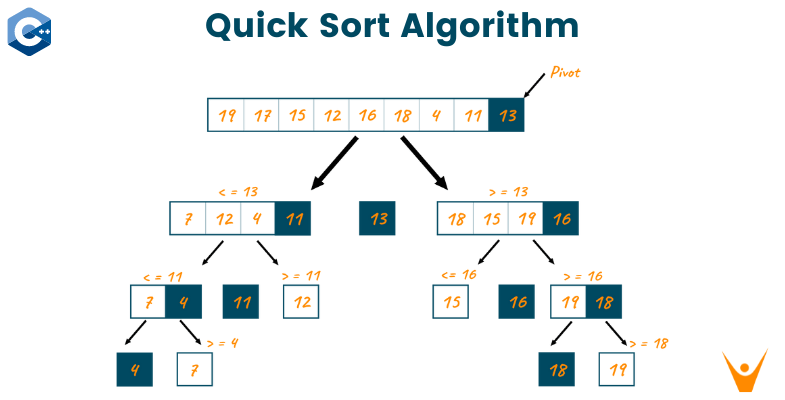